<a href="https://colab.research.google.com/github/Smarth2005/Machine-Learning/blob/main/Mini%20Projects/Vehicle-Based%20Traffic%20Classification/Traffic%20Situation%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Traffic Situation Classification from Vehicle Count Data**

<div align="justify">

Urban traffic congestion poses major challenges for city infrastructure and mobility. To address this, the goal of this project is to build a machine learning model that classifies traffic conditions into four levels—Heavy, High, Normal, and Low—based on 15-minute interval data collected by a computer vision system.

**Data source:** [Kaggle] https://www.kaggle.com/datasets/hasibullahaman/traffic-prediction-dataset

The dataset includes counts of cars, bikes, buses, and trucks, along with timestamps (hour, date, day of the week). By analyzing patterns in vehicle volumes and time-based trends, the model aims to enable real-time traffic situation classification, supporting smarter traffic management and planning.

</div>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Traffic.csv to Traffic (2).csv


In [ ]:
traffic = pd.read_csv('Traffic.csv')
traffic.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [ ]:
traffic.shape

(2976, 9)

In [ ]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [ ]:
traffic['Traffic Situation'].unique()

array(['low', 'normal', 'heavy', 'high'], dtype=object)

In [ ]:
traffic['Day of the week'].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

In [ ]:
# Check for missing values
traffic.isnull().sum()

,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0


We are fortunate enough to have no missing values in the dataset.

In [ ]:
traffic.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [ ]:
traffic.tail()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
2971,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
2972,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
2973,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
2974,11:30:00 PM,9,Thursday,16,5,0,27,48,normal
2975,11:45:00 PM,9,Thursday,14,3,1,15,33,normal


It seems like the `Date` feature has already been encoded.

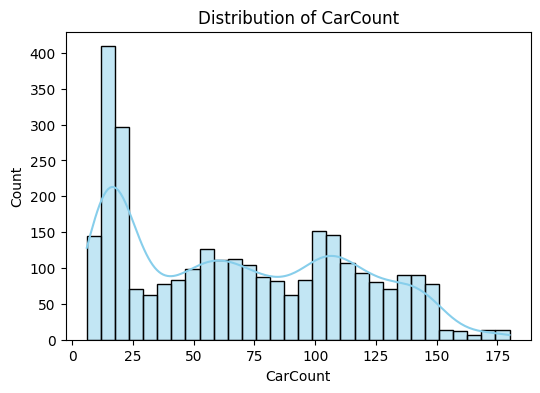

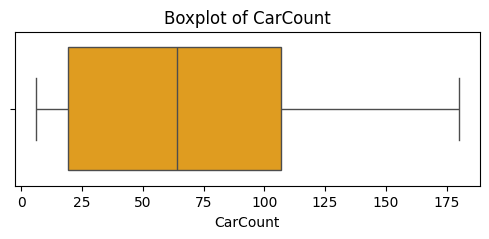

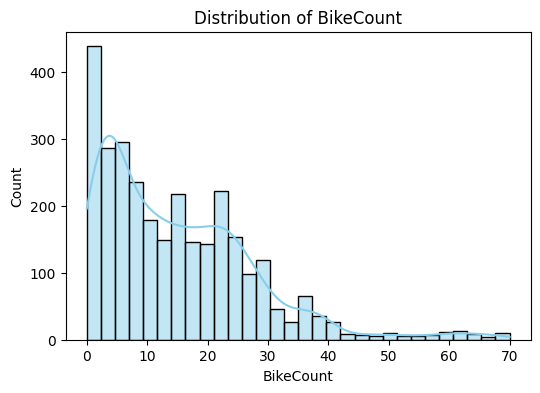

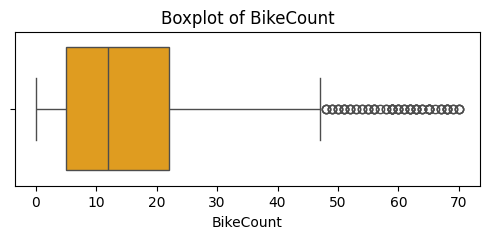

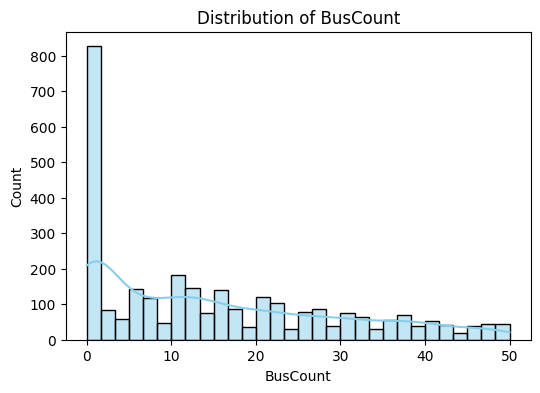

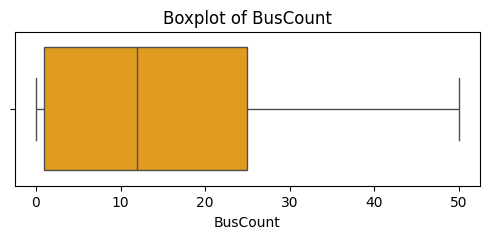

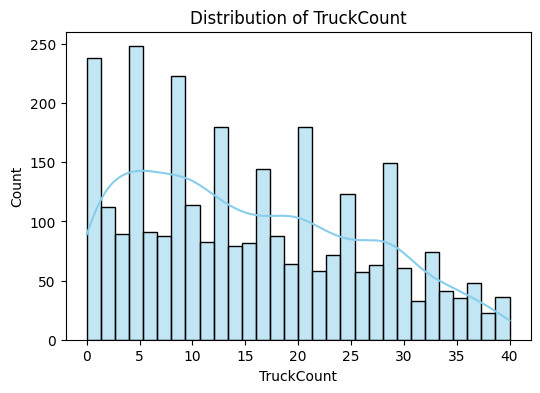

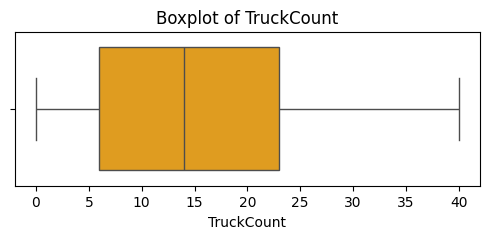

In [ ]:
# List vehicle columns
vehicle_cols = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount']

# Distribution of vehicle counts

for col in vehicle_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(traffic[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.show()

    plt.figure(figsize=(6,2))
    sns.boxplot(x=traffic[col], color='orange')
    plt.title(f"Boxplot of {col}")
    plt.show()


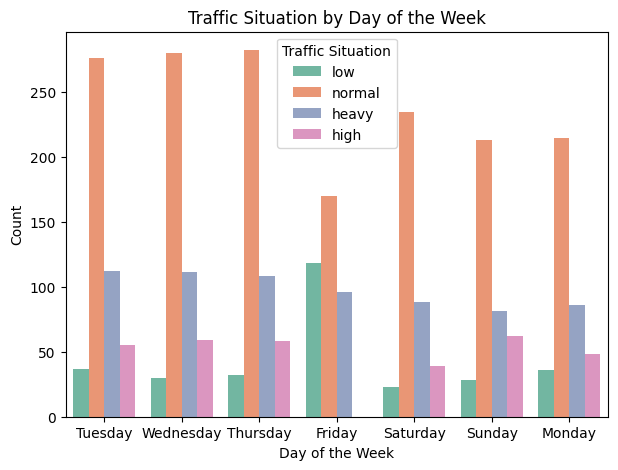

In [ ]:
# Day of the Week vs Traffic Situation
plt.figure(figsize=(7,5))
sns.countplot(x='Day of the week', hue='Traffic Situation', data=traffic, palette='Set2')
plt.title("Traffic Situation by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Count")
plt.show()

From the plot, we observe that the **"Normal"** traffic situation dominates across all days of the week.

The **"Heavy"** category remains fairly steady from Tuesday through Friday, with a slight decrease on the weekends (Saturday and Sunday).

The **"High"** traffic situation is the least common across all days.

Interestingly, **Friday shows the highest low-traffic count.** This could suggest periods of reduced congestion on Fridays — possibly due to early departures, flexible work schedules, or other weekday-end adjustments.

/tmp/ipython-input-13-1816432174.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Traffic Situation', y=col, data=traffic, palette='Set3')


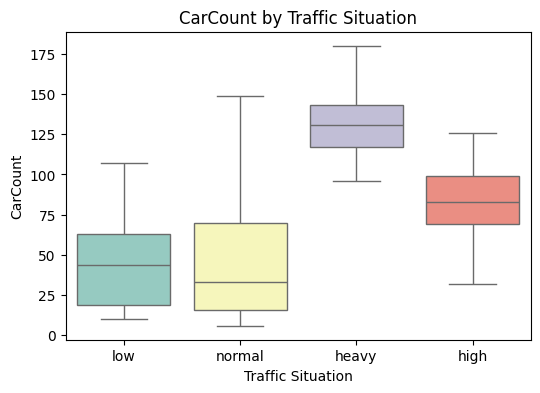

/tmp/ipython-input-13-1816432174.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Traffic Situation', y=col, data=traffic, palette='Set3')


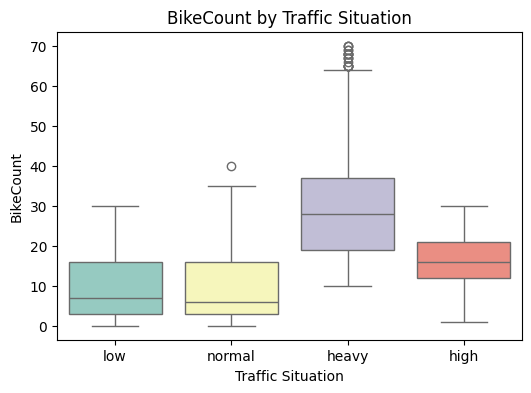

/tmp/ipython-input-13-1816432174.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Traffic Situation', y=col, data=traffic, palette='Set3')


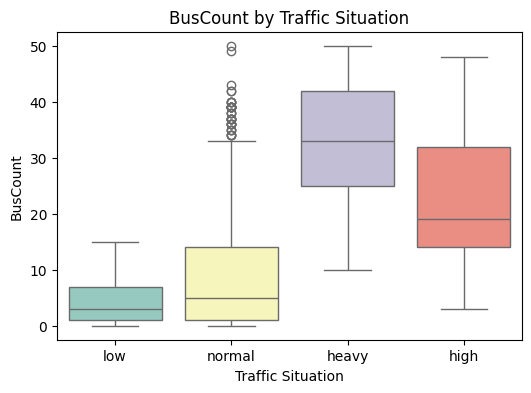

/tmp/ipython-input-13-1816432174.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Traffic Situation', y=col, data=traffic, palette='Set3')


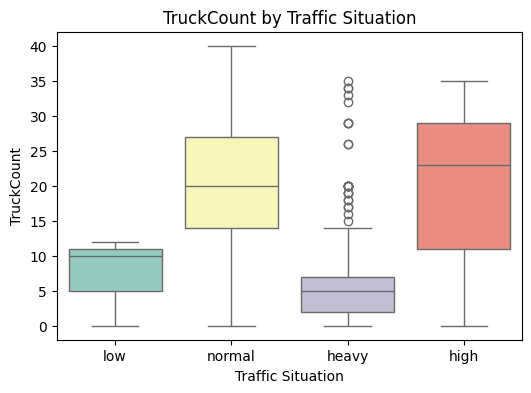

In [ ]:
# Traffic Situation vs vehicle counts
for col in vehicle_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Traffic Situation', y=col, data=traffic, palette='Set3')
    plt.title(f"{col} by Traffic Situation")
    plt.show()

The boxplot analysis highlights the dominance of cars and buses in congested scenarios **(Heavy traffic)** and the potential for increased bike usage as traffic worsens.

**High traffic** maintains elevated vehicle counts across all types, with greater variability than heavy traffic, possibly reflecting mixed traffic conditions as congestion eases slightly or fluctuates.

**Normal traffic** shows the most variability in car and truck counts, with irregular surges in bus and bike numbers.

**Low traffic** conditions exhibit uniformly low counts across all vehicle types.

<Axes: xlabel='Day of the week', ylabel='count'>

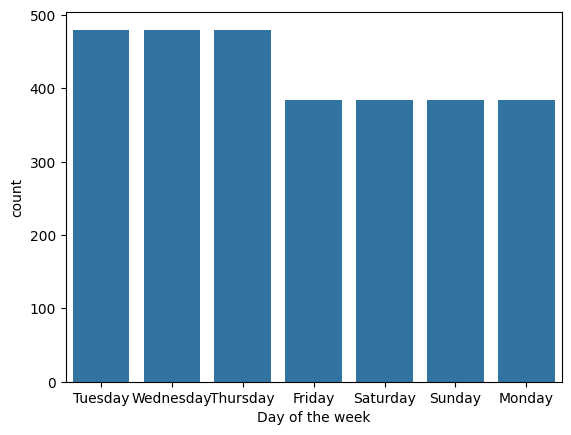

In [ ]:
sns.countplot(x='Day of the week', data=traffic)

In [ ]:
traffic['Day of the week'].value_counts()

,count
Day of the week,
Tuesday,480
Wednesday,480
Thursday,480
Friday,384
Saturday,384
Sunday,384
Monday,384


In [ ]:
traffic

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal
...,...,...,...,...,...,...,...,...,...
2971,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
2972,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
2973,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
2974,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


In [ ]:
# Convert Time string to datetime (Time_dt)
traffic['Time_dt'] = pd.to_datetime(traffic['Time'], format='%I:%M:%S %p', errors='coerce')

# Drop rows where parsing failed (if any)
traffic = traffic.dropna(subset=['Time_dt'])

In [ ]:
traffic.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Time_dt
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low,1900-01-01 00:00:00
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low,1900-01-01 00:15:00
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low,1900-01-01 00:30:00
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low,1900-01-01 00:45:00
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal,1900-01-01 01:00:00


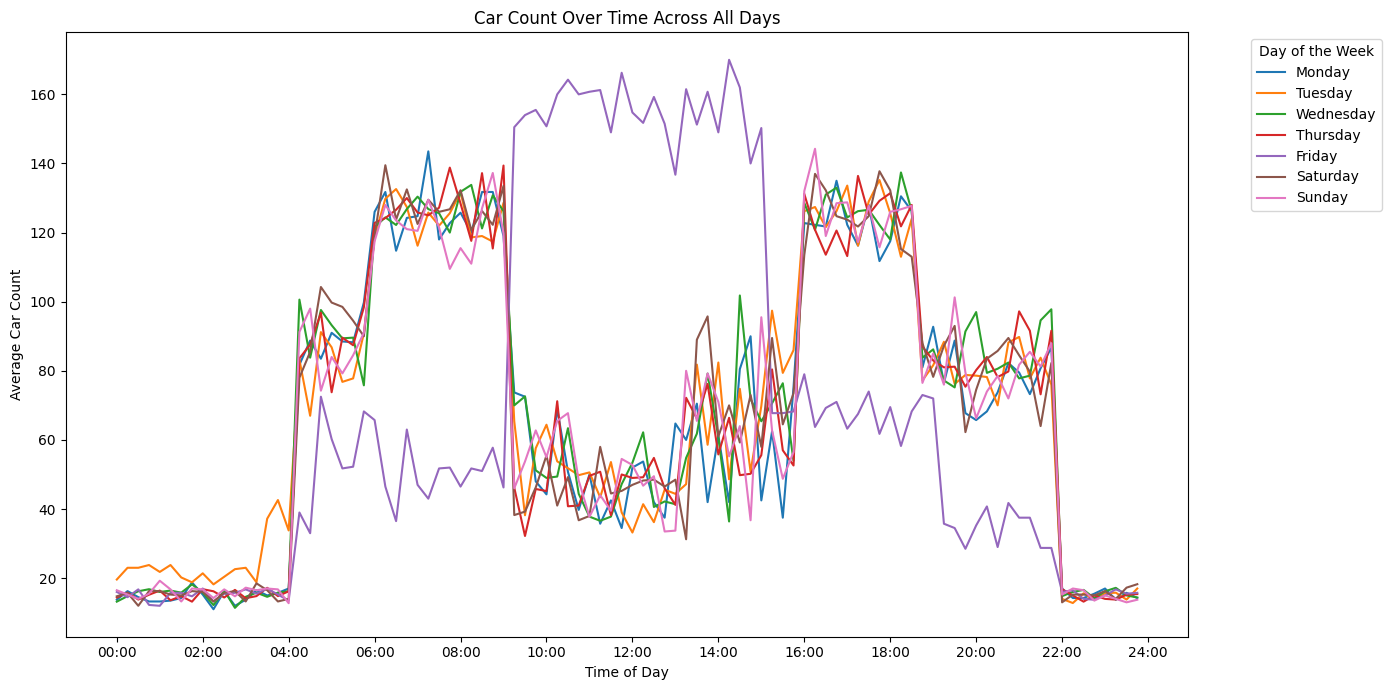

In [ ]:
# Create seconds since midnight
traffic['SecondsSinceMidnight'] = (
    traffic['Time_dt'].dt.hour * 3600 +
    traffic['Time_dt'].dt.minute * 60 +
    traffic['Time_dt'].dt.second
)

# Group by day + time to get mean car count at each 15 min interval
grouped = (
    traffic.groupby(['Day of the week', 'SecondsSinceMidnight'])['CarCount']
    .mean()
    .reset_index()
)

# Set proper day order (optional but clean legend)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
grouped['Day of the week'] = pd.Categorical(grouped['Day of the week'], categories=day_order, ordered=True)

# Plot
plt.figure(figsize=(14,7))
sns.lineplot(
    data=grouped,
    x='SecondsSinceMidnight',
    y='CarCount',
    hue='Day of the week',
    palette='tab10'
)

# Format x-axis as time
import matplotlib.ticker as ticker
def sec_to_time(x, pos):
    h = int(x // 3600)
    m = int((x % 3600) // 60)
    return f'{h:02d}:{m:02d}'

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(sec_to_time))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(3600*2))  # label every 2 hours

plt.xlabel('Time of Day')
plt.ylabel('Average Car Count')
plt.title('Car Count Over Time Across All Days')
plt.legend(title='Day of the Week', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


The Car Count over time shows clear patterns linked to daily traffic behavior. On weekdays (except Friday), distinct peaks appear during morning (around 7 AM to 10 AM) and evening (approximately 5 PM to 8 PM) hours, reflecting typical commuting periods.

Friday exhibits an exceptional Car traffic, surging at peak hours from 10 AM to 4 PM and slightly reducing as the day falls.  Weekends display a flatter distribution, with less pronounced peaks and more evenly spread car usage throughout the day. Late-night and early-morning hours consistently see minimal car activity across all days.

These trends highlight predictable congestion periods during rush hours, particularly on weekdays, which could guide targeted traffic management interventions.

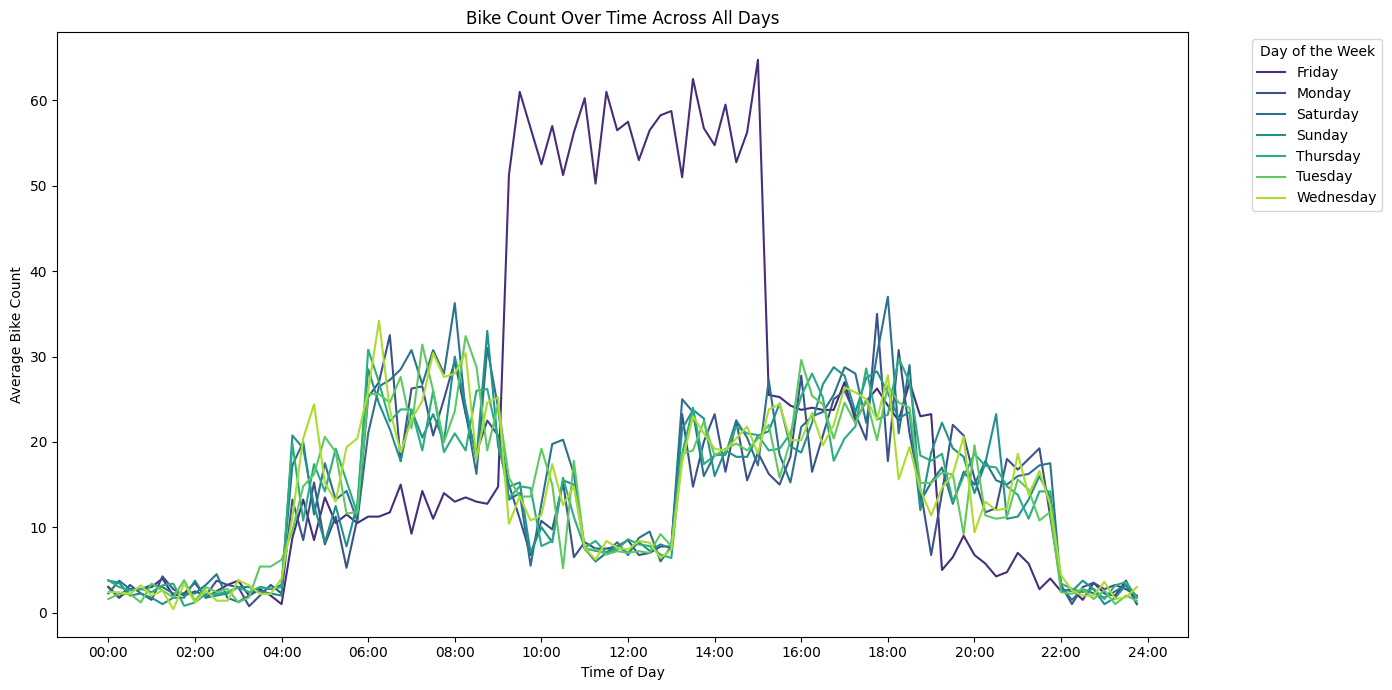

In [ ]:
# 🚲 Bike Count
grouped_bike = (
    traffic.groupby(['Day of the week', 'SecondsSinceMidnight'])['BikeCount']
    .mean()
    .reset_index()
)

plt.figure(figsize=(14,7))
sns.lineplot(
    data=grouped_bike,
    x='SecondsSinceMidnight',
    y='BikeCount',
    hue='Day of the week',
    palette='viridis'
)

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(sec_to_time))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(3600 * 2))
plt.title('Bike Count Over Time Across All Days')
plt.xlabel('Time of Day')
plt.ylabel('Average Bike Count')
plt.legend(title='Day of the Week', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Bike traffic plot is similar to Car traffic.

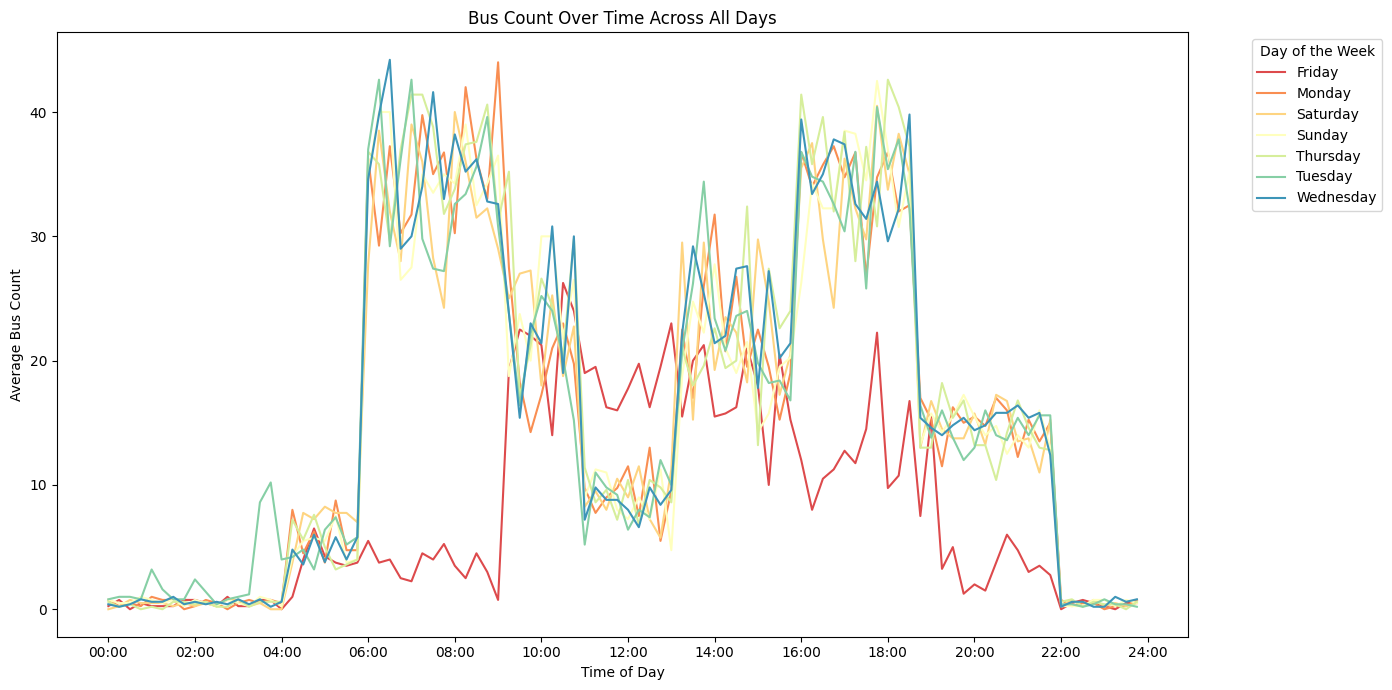

In [ ]:
# 🚌 Bus Count
grouped_bus = (
    traffic.groupby(['Day of the week', 'SecondsSinceMidnight'])['BusCount']
    .mean()
    .reset_index()
)

plt.figure(figsize=(14,7))
sns.lineplot(
    data=grouped_bus,
    x='SecondsSinceMidnight',
    y='BusCount',
    hue='Day of the week',
    palette='Spectral'
)

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(sec_to_time))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(3600 * 2))
plt.title('Bus Count Over Time Across All Days')
plt.xlabel('Time of Day')
plt.ylabel('Average Bus Count')
plt.legend(title='Day of the Week', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The Bus Count over time reveals a structured pattern aligned with scheduled public transport operations. On weekdays (except Friday), bus activity shows distinct peaks during morning hours (roughly 6 AM to 10 AM) and evening hours (around 4 PM to 8 PM), corresponding to commuter demand for school, office, and other daily travel. Midday periods typically maintain a moderate, steady flow, supporting off-peak passengers.

On Fridays, bus traffic is generally less and the plot shows an opposite trend(higher bus traffic during the midday from 10 AM to 6 PM). On weekends, the peaks are generally less sharp, with a more even distribution of bus activity across the day, likely catering to leisure travel and flexible schedules.

 This pattern reflects how bus services are designed to match commuter needs during rush hours while providing consistent availability during off-peak times.

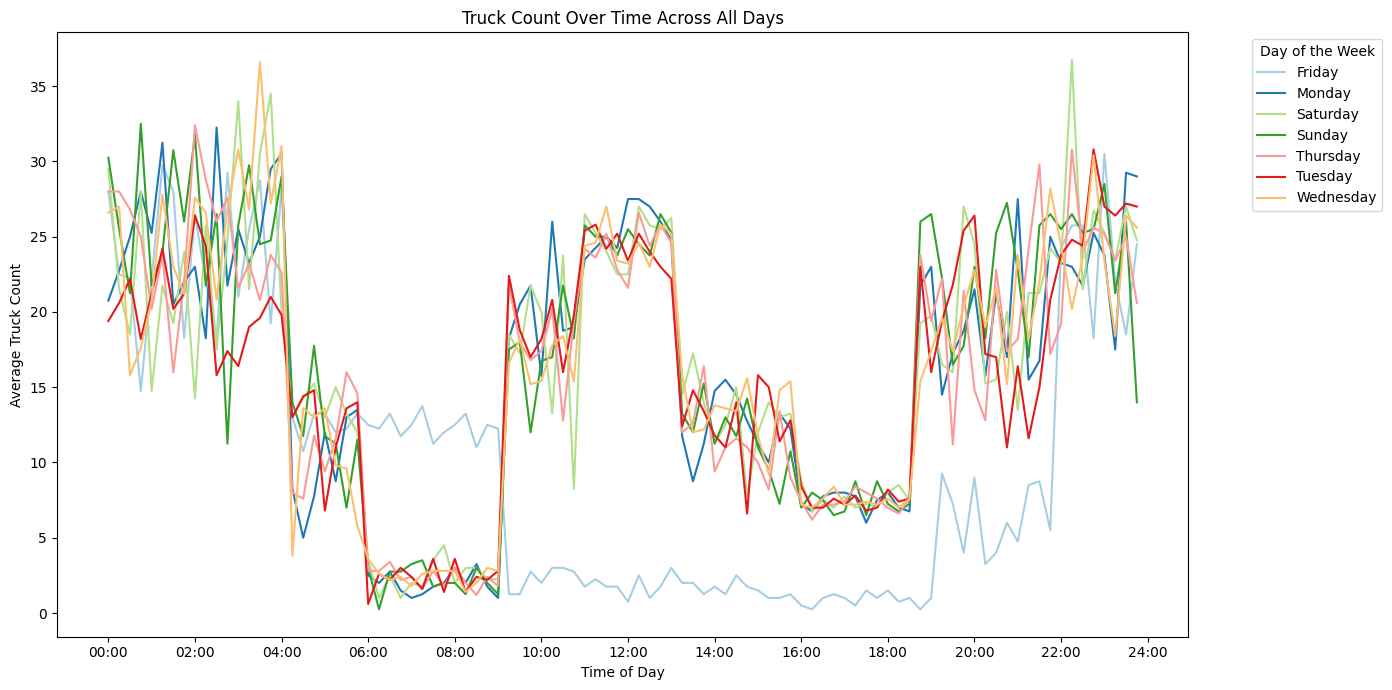

In [ ]:
# 🚛 Truck Count
grouped_truck = (
    traffic.groupby(['Day of the week', 'SecondsSinceMidnight'])['TruckCount']
    .mean()
    .reset_index()
)

plt.figure(figsize=(14,7))
sns.lineplot(
    data=grouped_truck,
    x='SecondsSinceMidnight',
    y='TruckCount',
    hue='Day of the week',
    palette='Paired'
)

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(sec_to_time))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(3600 * 2))
plt.title('Truck Count Over Time Across All Days')
plt.xlabel('Time of Day')
plt.ylabel('Average Truck Count')
plt.legend(title='Day of the Week', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The line chart effectively illustrates average truck traffic, revealing a clear weekly seasonality: Mondays and Thursdays consistently show the highest average truck counts. Conversely, weekend traffic, particularly on Sundays, drops significantly, often to near-negligible levels, underscoring the strong correlation between truck operations and standard business weekdays. This predictable pattern is vital for optimizing logistics and resource allocation.

 Furthermore, even during late-night or midnight hours, truck traffic doesn't cease entirely; a sustained level of activity suggests continuous operations like long-haul freight or overnight deliveries, indicating a persistent 24/7 operational aspect for a portion of the truck movement.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import LabelEncoder
from sklearn.metrics         import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble        import RandomForestClassifier
from sklearn.linear_model    import LogisticRegression
from sklearn.svm             import SVC
from xgboost                 import XGBClassifier

# One-hot encode Day of the week
X = traffic[['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'SecondsSinceMidnight']]
X = pd.concat([X, pd.get_dummies(traffic['Day of the week'], prefix='Day')], axis=1)

# Encode target
le = LabelEncoder()
y = le.fit_transform(traffic['Traffic Situation'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models to test
models = {
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'SVM': SVC()
}

# Train and evaluate
for name, model in models.items():
    print(f"\n🟢 {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))



🟢 RandomForest
Accuracy: 0.9430
Classification Report:
              precision    recall  f1-score   support

       heavy       0.88      0.99      0.93       127
        high       0.92      0.75      0.82        63
         low       0.98      0.95      0.97        66
      normal       0.96      0.96      0.96       340

    accuracy                           0.94       596
   macro avg       0.94      0.91      0.92       596
weighted avg       0.94      0.94      0.94       596

Confusion Matrix:
[[126   1   0   0]
 [  7  47   0   9]
 [  0   0  63   3]
 [ 10   3   1 326]]

🟢 XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:44:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9581
Classification Report:
              precision    recall  f1-score   support

       heavy       0.91      1.00      0.95       127
        high       0.92      0.89      0.90        63
         low       0.98      0.95      0.97        66
      normal       0.98      0.96      0.97       340

    accuracy                           0.96       596
   macro avg       0.95      0.95      0.95       596
weighted avg       0.96      0.96      0.96       596

Confusion Matrix:
[[127   0   0   0]
 [  3  56   0   4]
 [  0   0  63   3]
 [  9   5   1 325]]

🟢 LogisticRegression


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7366
Classification Report:
              precision    recall  f1-score   support

       heavy       0.67      0.94      0.78       127
        high       0.39      0.11      0.17        63
         low       0.87      0.30      0.45        66
      normal       0.78      0.86      0.82       340

    accuracy                           0.74       596
   macro avg       0.68      0.55      0.56       596
weighted avg       0.72      0.74      0.70       596

Confusion Matrix:
[[120   0   0   7]
 [ 16   7   0  40]
 [  9   0  20  37]
 [ 34  11   3 292]]

🟢 SVM
Accuracy: 0.5705
Classification Report:
              precision    recall  f1-score   support

       heavy       0.00      0.00      0.00       127
        high       0.00      0.00      0.00        63
         low       0.00      0.00      0.00        66
      normal       0.57      1.00      0.73       340

    accuracy                           0.57       596
   macro avg       0.14      0.25      0.18       596
wei

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Comparing all models' accuracy score:
- Logistic Regression &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: 73.66%
- Support Vector Classifier : 57.05%
- Random Forest Classifier : 94.30%
- XGBoost Classifier &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: 95.81%


Based on these results, XGBoost Classifier is selected as the final model due to its superior accuracy and strong performance on this dataset.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
search = RandomizedSearchCV(xgb_clf, param_grid, n_iter=20, scoring='accuracy', cv=3, random_state=42, verbose=1)
search.fit(X_train, y_train)

print(f"Best parameters: {search.best_params_}")
print(f"Best cross-validated accuracy: {search.best_score_:.4f}")


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters: {'subsample': 0.7, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
Best cross-validated accuracy: 0.9672


In [ ]:
final_model = search.best_estimator_

In [ ]:
y_pred = final_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9614093959731543

So, our XGBoost model achieves an accuracy of 96.14% after tuning.

In [ ]:
import joblib

joblib.dump(final_model, 'xgboost_traffic_model.pkl')

['xgboost_traffic_model.pkl']

In [ ]:
from google.colab import files
files.download('xgboost_traffic_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>